# Intro to ML

This assignment departs from the tradition of implementing everything from scratch and we will use a few libraries:

* `numpy`, the Python library for handling matrices
* `seaborn`, a library for easily plotting cute charts
* `scikit-learn`, a library implementing many ML algorithm

In some cases, uncommenting and executing the following cell will suffice to install them. In others, it will not, and you'll need to consult the documentation for your Python installation.

In [187]:
# !pip install numpy
# !pip install seaborn
# !pip install scikit-learn

Thorought the whole assignment we will use `numpy`. If you are unfamiliar with the library, take a moment to go through the tutorial: https://numpy.org/doc/stable/user/absolute_beginners.html

In [188]:
import numpy as np

## Task 1: Simple linear regression

The following `SimpleLinearRegression` class represents a one-dimensional regressor. It exposes four fields that can be set from the constructor:

* `w1` is the slope of the linear function, to be used by the `predict` function and set by the `fit` function
* `w0` is the intercept of the linear function, to be used by the `predict` function and set by the `fit` function
* `learning_rate` is the learning rate to be used by the `fit` function
* `max_iterations` is the maximal number of updates to be performed by the `fit` function

It also exposes two functions, that you need to complete:

* `predict` is given `x`, a single-dimensional vector such that every value corresponds to the single feature of another example. It should return a vector of the same length `y`, such that $y_i = w_1x_i + w_0$
* `fit` is given two vectors: `x` and `y`, and it should iteratively optimize `w1` and `w0` using the gradient descent algorithm.  Again, `x` and `y` are vectors, such that `x[i]` is the feature of the `i`-th example, whereas `y[i]` is the decision attribute (i.e., the value to approximate with the line).

**Hint**: To implement `fit` you will need the gradients of the mean-squared error (denoted by $L$). They are as follows:

$$ \frac{\partial L}{\partial w_1} = \frac{2}{n}\sum_{i=1}^n (\hat{y}_i-y_i)\cdot x_i $$
$$ \frac{\partial L}{\partial w_0} = \frac{2}{n}\sum_{i=1}^n (\hat{y}_i-y_i) $$

where $\hat{y}_i$ is the prediction according to the current values of $w_1$ and $w_0$ for the $i$-th example

In [189]:
class SimpleLinearRegression:
    def __init__(self, learning_rate: float, max_iterations: int, w1: float=0, w0: float=0):
        self.w1 = w1
        self.w0 = w0
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations

    def fit(self, x: np.ndarray, y: np.ndarray):
        n = x.shape[0]
        for _ in range(self.max_iterations):
            y_pred = self.predict(x)
            error = y_pred - y
            grad_w1 = (2/n) * np.sum(error * x)
            grad_w0 = (2/n) * np.sum(error)

            self.w1 -= self.learning_rate * grad_w1
            self.w0 -= self.learning_rate * grad_w0

    def predict(self, x: np.ndarray) -> np.ndarray:
        return self.w1 * x + self.w0

We will start with testing the `predict` function. First: $y=10x$

In [190]:
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

regressor = SimpleLinearRegression(0, 0, 10, 0)
y_predicted = regressor.predict(x)

assert (y_predicted == y).all()

Now: $y=2x+10$

In [191]:
x = np.array([1, 2, 3])
y = np.array([12, 14, 16])

regressor = SimpleLinearRegression(0, 0, 2, 10)
y_predicted = regressor.predict(x)

assert (y_predicted == y).all()

And here we try to learn the coefficients for: $y=10x+6$

In [192]:
x = np.array([1, 2, 3])
y = np.array([16, 26, 36])

regressor = SimpleLinearRegression(0.01, 10_000)
regressor.fit(x, y)

print(f"Model: y={regressor.w1}x+{regressor.w0}")
assert abs(regressor.w1 - 10) <= 0.01
assert abs(regressor.w0 - 6) <= 0.01

Model: y=10.000000000020812x+5.999999999952693


Let's consider a bit more involved example. The following cell maps flat areas in `areas` to their rental prices (in Arbitrary Units of Currency, AUC for short) in `prices`. Both vectors are of the same length, and are in the same order, i.e., the `i`-th flat has the area `areas[i]` and can be rented for `prices[i]` AUC

In [193]:
areas = np.array([77.0, 50.0, 44.0, 65.0, 65.0, 52.0, 48.0, 45.0, 45.0, 36.0, 53.0, 43.0, 53.0, 27.0, 100.0, 52.0, 84.0, 77.0, 42.0, 75.0, 47.0, 52.0, 64.0, 42.0, 85.0, 30.0])
prices = np.array([282, 250, 262, 399, 285, 308, 336, 277, 275, 219, 332, 262, 334, 185, 370, 329, 179, 265, 237, 330, 265, 345, 307, 270, 355, 179])

We should be able to learn a reasonable regressor for it.

In [194]:
regressor = SimpleLinearRegression(0.0001, 100_000)
regressor.fit(areas, prices)

print(f"Model: price = {regressor.w1} * area + {regressor.w0}")

Model: price = 2.030083193330937 * area + 169.60880745566175


And now let's see how the predictions and reality differ. Since comparing a bunch of numbers is inconvenient, we will plot a chart instead using the `seaborn` library. In the chart, the points represent the actual data, whereas the line is the output of the linear regression. The chart should look reasonable, i.e., the line should go through the middle of the cloud of points.

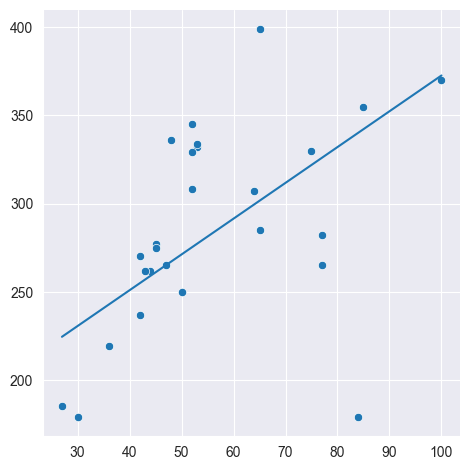

In [195]:
predicted_prices = regressor.predict(areas)
import seaborn as sns
sns.relplot(x=areas, y=prices)
_ = sns.lineplot(x=areas, y=predicted_prices)

## Interlude: ridge regression in scikit-learn

We will now use a slightly larger dataset called *diabetes*. We begin by loading it using a loader provied in the `scikit-learn` library. You will use that library in the remaining tasks.

In [196]:
import sklearn.datasets
dataset = sklearn.datasets.load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Threre are 442 examples described by 10 features each, organized into a matrix `dataset.data`:

In [197]:
dataset.data.shape

(442, 10)

There is also a vector of values to predict:

In [198]:
dataset.target.shape

(442,)

In [199]:
print(f"The first example")
print("x[0]", dataset.data[0])
print("y[0]", dataset.target[0])

The first example
x[0] [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
y[0] 151.0


We split the dataset into two parts:
* a training & validation set - to optimize the model and its hyperparameters
* a test set - to see how well a model behaves on unseen data

In [200]:
import sklearn.model_selection
trainval_X, test_X, trainval_y, test_y = sklearn.model_selection.train_test_split(dataset.data, dataset.target, random_state=42, test_size=.2)
print("Training & validation set (80% of 442):", trainval_X.shape, trainval_y.shape)
print("Test set (20% of 442):", test_X.shape, test_y.shape)

Training & validation set (80% of 442): (353, 10) (353,)
Test set (20% of 442): (89, 10) (89,)


Let's train a ridge regression model, i.e, a linear regression model with a regularization component to avoid overfitting. Ridge optimizes a weighted sum of two components:
$$ Ridge\_loss =  MSE + \alpha \cdot regularization\_term $$
The higher the $\alpha$, the stronger the regularization pressure, and the lower the contribution of the MSE to the loss function.

In [201]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(trainval_X, trainval_y)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


How well the model fares in terms of MSE on the training set?

In [202]:
from sklearn.metrics import mean_squared_error

pred = regressor.predict(trainval_X)
mean_squared_error(trainval_y, pred)

3388.1826180801304

And on the test set?

In [203]:
pred = regressor.predict(test_X)
mean_squared_error(test_y, pred)

3077.41593882723

Now let's see what happens if we use a different value of the hyperparameter $\alpha$

In [204]:
regressor = Ridge(alpha=10)
regressor.fit(trainval_X, trainval_y)
print("MSE on training:", mean_squared_error(trainval_y, regressor.predict(trainval_X)))
print("MSE on test:", mean_squared_error(test_y, regressor.predict(test_X)))

MSE on training: 5083.9860293099855
MSE on test: 4443.95263666302


## Task 2: Multiple linear regression using scikit-learn

As you can see, the resulting values are very different. **Complete the function** below with some strategy to find the best value of the hyperparameter `alpha` with respect to the mean-squared error `mse`. The function is given a matrix of features `X` and the corresponding vector of targets `y`. You must split them into a training and validation set (remember to fix the seed!), consider numerous values of `alpha` while training regressors on the training set, and select the best one based on the performance on the validation set. Finally, you must return a trained regressor that performs the best according to your measurements.

In [205]:
def train_regressor(X: np.ndarray, y: np.ndarray) -> sklearn.linear_model.Ridge:    
    X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=42, test_size=0.2)

    best_mse = float('inf')
    best_regressor = None
    alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    for alpha in alphas:
        model = sklearn.linear_model.Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
        mse = sklearn.metrics.mean_squared_error(y_val, pred)

        if mse < best_mse:
            best_mse = mse
            best_regressor = model

    return best_regressor

In [206]:
best_regressor = train_regressor(trainval_X, trainval_y)
print("The best regressor is", best_regressor)

The best regressor is Ridge(alpha=0.001)


Ordinarly, you use the test set to get an unbiased evaluation of your solution. However, here's a small hint for you: you want the MSE on the test set to be below 2885.

In [207]:
mean_squared_error(test_y, best_regressor.predict(test_X))

2905.419114760224

## Task 3: Learning agent

A new chain of casinos is opening throughout the Middle-earth. They offer only one game and a simple one to boot. Each round of the game goes like this:

1. The casino announces a $n \times m$ matrix of numbers. $n$ changes from announcement to announcement, but $m$ is fixed.
2. The player places a bet in the form of a vector $n$ numbers and a stake the place on their bet. The player immediately pays the stake. If the player cannot pay, the ORC (Orcs Ready to Chastise) security deals with them.
3. Casino performs some computation and arrives at a vector of $n$ numbers of their own. They compare the corresponding positions in the bet and in their vector and pay out the stake to the player for every position that matches. Since nobody trusts a casino, after they finish the computation and update your account, they disclose their vector, so you can verify their integrity.

The player may play as many games as they want as long as they have money.

An abstract class representing any of the casinos of the chain is shown below as the class `Casino`. It exposes three functions:

* `current_announcement` is a property you read to get the matrix announced by the casino
* `play` is a function you call to place a bet and get the casino's vector back
* `balance` is the current state of your account

In [208]:
class Casino:
    @property
    def current_announcement(self) -> np.ndarray:
        ...

    def play(self, bet: np.ndarray, stake: int) -> np.ndarray:
        ...

    @property
    def balance(self) -> int:
        ...

A new casino of the chain was built on the outskirts of Bree, and it seems it can be neatly represented by the following class `LinearCasino`. The secret computation it performs is just a linear function. While all casinos of the chain use linear functions, some are more sophisticated than the others and it seems this one is a pretty boring one.

`LinearCasino` receives up to three arguments to the constructor:

* `w` is a vector of numbers that serves as weights in a linear function. The last element is the intercept.
* `cash` is the initial balance of the player's account
* `seed` is an optional argument, a seed to the random number generator

**Disclaimer** Real-world casinos are not so easy. Don't play in them.

In [209]:
class LinearCasino:
    def __init__(self, w, cash: int, seed=None):
        self._w = np.array(w)
        assert len(self._w.shape) == 1
        assert cash > 0
        self._cash = cash        
        self._rng = np.random.default_rng(seed)        
        self._x = None
        self._new_round()

    def _new_round(self):
        n = self._rng.integers(1, 20)
        m = self._w.shape[0] - 1
        self._x = self._rng.integers(-100, 101, (n, m))

    @property
    def current_announcement(self) -> np.ndarray:
        return np.copy(self._x)

    def play(self, bet: np.ndarray, stake: int) -> np.ndarray:
        assert stake > 0
        assert self._cash >= stake
        self._cash -= stake
        n, m = self._x.shape
        assert bet.shape == (n,)
        ones = np.ones((n, 1))
        y = np.concatenate([self._x, ones], axis=1)@self._w        
        assert y.shape == (n,)        
        if stake > 0:
            self._cash += np.sum((np.abs(bet-y)<=0.01)*stake)
        self._new_round()
        return y

    @property
    def balance(self) -> int:
        return self._cash

Your task is to complete the following function `casino_player`. As the only argument, it is given an object implementing the `Casino` class with the initial balance of at least 10 units. Upon terminating, the balance in the casino should be at least $100,000$

In [210]:
def casino_player(casino: Casino):
    from sklearn.linear_model import Ridge
    import numpy as np

    model = Ridge(alpha=0.1)
    X_history = []
    y_history = []

    while True:
        X_curr = casino.current_announcement
        if len(X_history) > 0:
            total_samples = sum(x.shape[0] for x in X_history)
            n_features = X_history[0].shape[1]
            if total_samples > n_features + 40:
                break

        if casino.balance < 1:
            break

        bet = np.zeros(X_curr.shape[0])
        y_res = casino.play(bet, 1)
        X_history.append(X_curr)
        y_history.append(y_res)

    X_train = np.vstack(X_history)
    y_train = np.concatenate(y_history)
    model.fit(X_train, y_train)

    while casino.balance < 100000:
        X_curr = casino.current_announcement
        prediction = model.predict(X_curr)

        stake = int(casino.balance * 0.5)
        if stake < 1: stake = 1

        casino.play(prediction, stake)

Let's see how well your agent fares!

In [211]:
casino = LinearCasino([10, 20, 5], 100, seed=42)
casino_player(casino)
print("Final balance (should be at least 100000)", casino.balance)

Final balance (should be at least 100000) 142129


And in another instance:

In [212]:
casino = LinearCasino([1, 2, 3, 4, 5, 0], 10, seed=0xc0ffee)
casino_player(casino)
print("Final balance (should be at least 100000)", casino.balance)

Final balance (should be at least 100000) 140382


It should also fare well if thrown against a bunch of randomized casinos:

In [213]:
rng = np.random.default_rng(0xbeef)
for i in range(10):
    m = rng.integers(5, 20, 1)
    w = rng.integers(1, 100, m)
    seed = rng.integers(0, 2**32, 1)
    casino = LinearCasino(w, 100, seed=seed)
    casino_player(casino)
    print("Casino", i, "balance", casino.balance)

Casino 0 balance 141750
Casino 1 balance 321255
Casino 2 balance 116236
Casino 3 balance 217141
Casino 4 balance 287104
Casino 5 balance 133981
Casino 6 balance 526500
Casino 7 balance 324360
Casino 8 balance 507151
Casino 9 balance 130989
